<a href="https://colab.research.google.com/github/spatidar2109/ML_Learing/blob/main/XG_Boost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[[2881   13]
 [  67   39]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2894
           1       0.75      0.37      0.49       106

    accuracy                           0.97      3000
   macro avg       0.86      0.68      0.74      3000
weighted avg       0.97      0.97      0.97      3000

0.9733333333333334


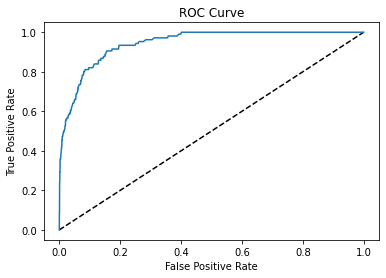

0.9443350588726187

In [1]:
import pandas as pd
#import numpy as np

Default = pd.read_csv("/content/Default.csv")
dum_Default = pd.get_dummies(Default, drop_first=True)

X = dum_Default.iloc[:,[0,1,3]]
y = dum_Default.iloc[:,2]

# Import the necessary modules
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, 
                                                    random_state=2018)

clf = XGBClassifier(random_state=2000)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

################ROC#############################

# Import necessary modules
from sklearn.metrics import roc_curve, roc_auc_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = clf.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
import matplotlib.pyplot as plt
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
roc_auc_score(y_test, y_pred_prob)





In [2]:
##################Tunning XGB#####################
lr_range = [0.001, 0.01, 0.1, 0.2,0.25, 0.3]
n_est_range = [10,20,30,50,100]
md_range = [2,4,6,8,10]

parameters = dict(learning_rate=lr_range,
                  n_estimators=n_est_range,
                  max_depth=md_range)

from sklearn.model_selection import GridSearchCV
clf = XGBClassifier(random_state=2000)
cv = GridSearchCV(clf, param_grid=parameters,
                  cv=5,scoring='roc_auc')

cv.fit(X,y)

print(cv.best_params_)

print(cv.best_score_)

{'learning_rate': 0.25, 'max_depth': 2, 'n_estimators': 30}
0.9479465192682641
